In [1]:
# Useful imports
import pandas as pd
import seaborn as sns
import numpy as np
import random
import math
import os.path
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
absa_results = pd.read_csv('./datasets/results/results_aggregated.csv')

In [3]:
absa_results = absa_results.drop('Text', axis=1)

In [4]:
features = absa_results.columns[1:]
features

Index(['Appearance Positive', 'Appearance Neutral', 'Appearance Negative',
       'Aroma Positive', 'Aroma Neutral', 'Aroma Negative', 'Palate Positive',
       'Palate Neutral', 'Palate Negative', 'Taste Positive', 'Taste Neutral',
       'Taste Negative'],
      dtype='object')

In [5]:
absa_results.head()

,Row Index,Appearance Positive,Appearance Neutral,Appearance Negative,Aroma Positive,Aroma Neutral,Aroma Negative,Palate Positive,Palate Neutral,Palate Negative,Taste Positive,Taste Neutral,Taste Negative
0,216,0.974481,0.005291,0.020228,0.982895,0.002254,0.014850,0.710195,0.022451,0.267354,0.633389,0.021023,0.345588
1,292,0.593674,0.215933,0.190393,0.493198,0.191977,0.314825,0.648823,0.206792,0.144386,0.502106,0.292476,0.205419
2,298,0.427067,0.377558,0.195375,0.702528,0.127771,0.169701,0.285166,0.687439,0.027395,0.994922,0.003798,0.001280
3,343,0.651201,0.049745,0.299054,0.911328,0.012691,0.075981,0.600418,0.066736,0.332846,0.583243,0.046122,0.370635
4,348,0.941425,0.023591,0.034984,0.998509,0.000367,0.001124,0.918099,0.031206,0.050695,0.881918,0.042310,0.075772


In [6]:
absa_results.count()

Row Index              44155
Appearance Positive    44155
Appearance Neutral     44155
Appearance Negative    44155
Aroma Positive         44155
Aroma Neutral          44155
Aroma Negative         44155
Palate Positive        44155
Palate Neutral         44155
Palate Negative        44155
Taste Positive         44155
Taste Neutral          44155
Taste Negative         44155
dtype: int64

<AxesSubplot:xlabel='Taste Positive', ylabel='Count'>

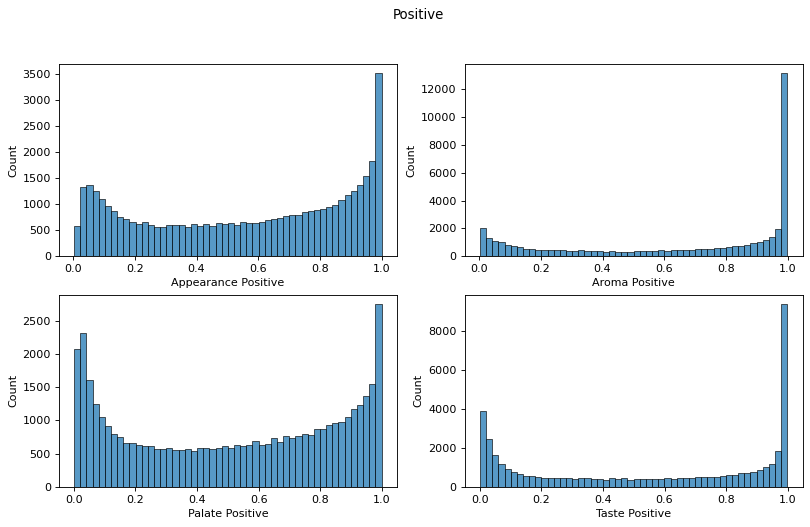

In [7]:
fig = plt.figure(figsize=(12,7), dpi=80)
plt.suptitle('Positive')
plt.subplot(221)
sns.histplot(absa_results['Appearance Positive'], bins=50)
plt.subplot(222)
sns.histplot(absa_results['Aroma Positive'], bins=50)
plt.subplot(223)
sns.histplot(absa_results['Palate Positive'], bins=50)
plt.subplot(224)
sns.histplot(absa_results['Taste Positive'], bins=50)

<AxesSubplot:xlabel='Taste Negative', ylabel='Count'>

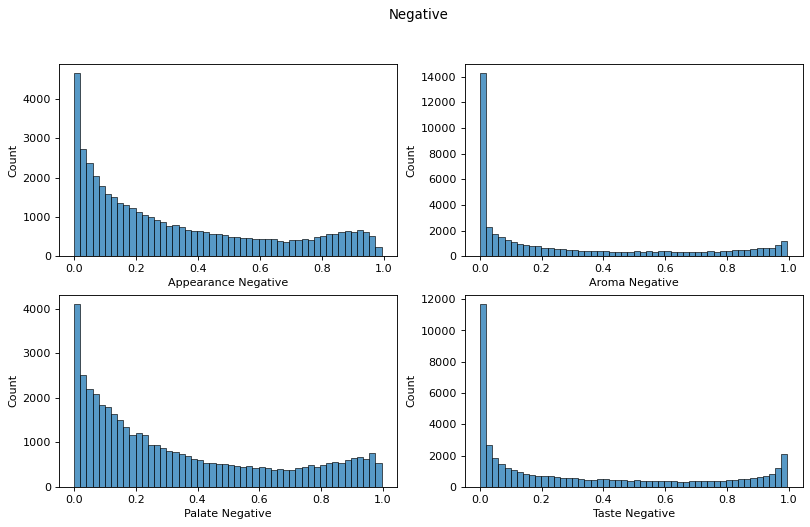

In [10]:
fig = plt.figure(figsize=(12,7), dpi=80)
plt.suptitle('Negative')
plt.subplot(221)
sns.histplot(absa_results['Appearance Negative'], bins=50)
plt.subplot(222)
sns.histplot(absa_results['Aroma Negative'], bins=50)
plt.subplot(223)
sns.histplot(absa_results['Palate Negative'], bins=50)
plt.subplot(224)
sns.histplot(absa_results['Taste Negative'], bins=50)

<AxesSubplot:xlabel='Taste Neutral', ylabel='Count'>

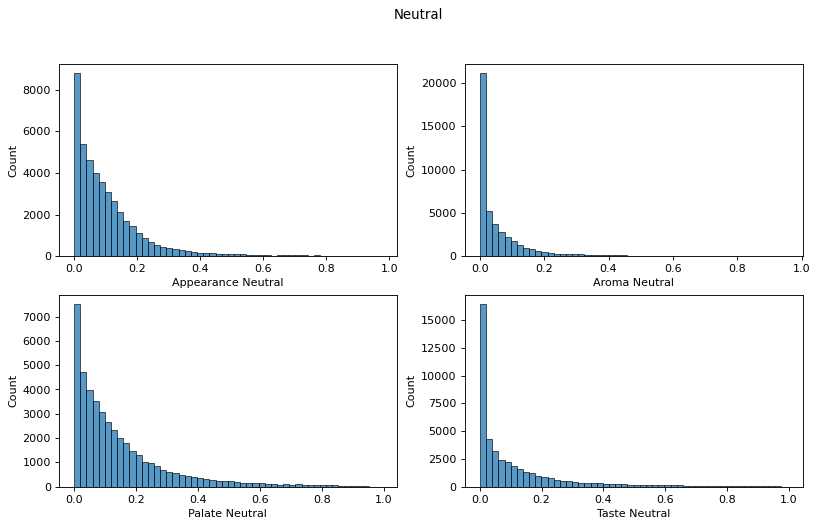

In [11]:
fig = plt.figure(figsize=(12,7), dpi=80)
plt.suptitle('Neutral')
plt.subplot(221)
sns.histplot(absa_results['Appearance Neutral'], bins=50)
plt.subplot(222)
sns.histplot(absa_results['Aroma Neutral'], bins=50)
plt.subplot(223)
sns.histplot(absa_results['Palate Neutral'], bins=50)
plt.subplot(224)
sns.histplot(absa_results['Taste Neutral'], bins=50)

<AxesSubplot:ylabel='Count'>

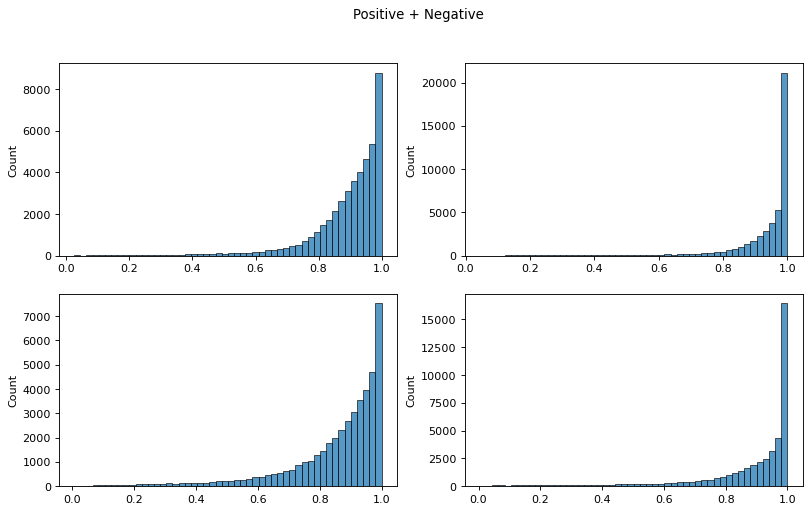

In [12]:
fig = plt.figure(figsize=(12,7), dpi=80)
plt.suptitle('Positive + Negative')
plt.subplot(221)
sns.histplot(absa_results['Appearance Positive'] + absa_results['Appearance Negative'], bins=50)
plt.subplot(222)
sns.histplot(absa_results['Aroma Positive'] + absa_results['Aroma Negative'], bins=50)
plt.subplot(223)
sns.histplot(absa_results['Palate Positive'] + absa_results['Palate Negative'], bins=50)
plt.subplot(224)
sns.histplot(absa_results['Taste Positive'] + absa_results['Taste Negative'], bins=50)

In [32]:
thresh = 0.0005

neut_0_appearance = len(absa_results[absa_results['Appearance Neutral'] < thresh]) / len(absa_results)
neut_0_aroma = len(absa_results[absa_results['Aroma Neutral'] < thresh]) / len(absa_results)
neut_0_palate = len(absa_results[absa_results['Palate Neutral'] < thresh]) / len(absa_results)
neut_0_taste = len(absa_results[absa_results['Taste Neutral'] < thresh]) / len(absa_results)

print("Percentage of [ Appearance Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_appearance * 100))
print("Percentage of [ Aroma Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_aroma * 100))
print("Percentage of [ Palate Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_palate * 100))
print("Percentage of [ Taste Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_taste * 100))

# They are least neutral towards AROMA and also, TASTE has a non-negligible score

Percentage of [ Appearance Neutral < 0.0005 ] reviews: 0.2401
Percentage of [ Aroma Neutral < 0.0005 ] reviews: 11.2286
Percentage of [ Palate Neutral < 0.0005 ] reviews: 0.1064
Percentage of [ Taste Neutral < 0.0005 ] reviews: 3.2975


In [37]:
# Average grade for Aroma Positive (approx. 1 - Aroma Negative) when Aroma Neutral < thresh
absa_results[absa_results['Aroma Neutral'] < thresh]['Aroma Positive'].mean()

0.9982687877611963

In [38]:
# Loading in the data
reviews = pd.read_pickle('./datasets/BeerAdvocate/reviews.pkl')
print(reviews.shape)

(2589587, 17)


In [39]:
# setting row index as a column - useful later
reviews['Row Index'] = reviews.index

In [40]:
# selecting necessary columns
reviews_clean = reviews[['Beer Id','Brewery Id','Style','Abv','Date','User Id','Appearance','Aroma',\
                         'Palate','Taste','Overall','Rating','Text', 'Row Index']]

In [41]:
reviews_clean = reviews_clean.merge(absa_results, on='Row Index')

In [42]:
# matching on User Id, Style and Abv
reviews_cartesian = reviews_clean.merge(reviews_clean, on=['User Id','Style','Abv'], suffixes=('1', '2'))

In [43]:
# filtering pairs where first one is absolutely better
reviews_pairs = reviews_cartesian[(reviews_cartesian['Rating1'] > reviews_cartesian['Rating2']) & \
                                  (reviews_cartesian['Overall1'] > reviews_cartesian['Overall2']) & \
                                  (reviews_cartesian['Aroma1'] > reviews_cartesian['Aroma2']) & \
                                  (reviews_cartesian['Appearance1'] > reviews_cartesian['Appearance2']) & \
                                  (reviews_cartesian['Taste1'] > reviews_cartesian['Taste2']) & \
                                  (reviews_cartesian['Palate1'] > reviews_cartesian['Palate2'])].copy()

In [44]:
# adding month columns to filtered data
reviews_pairs['Month1'] = reviews_pairs['Date1'].apply(lambda x: x.month)
reviews_pairs['Month2'] = reviews_pairs['Date2'].apply(lambda x: x.month)
reviews_pairs['Text Length1'] = reviews_pairs['Text1'].apply(len)
reviews_pairs['Text Length2'] = reviews_pairs['Text2'].apply(len)
# sns.lineplot(data=reviews_pairs, y='Rating1', x='Month1')
# sns.lineplot(data=reviews_pairs, y='Rating2', x='Month2')

In [45]:
matched_len_reviews_pairs = reviews_pairs[abs(reviews_pairs['Text Length1'] - \
                                               reviews_pairs['Text Length2']) <100]

In [46]:
winter_review_pairs = matched_len_reviews_pairs[(matched_len_reviews_pairs['Month1']>=1) & (matched_len_reviews_pairs['Month1']<=3) & \
              (matched_len_reviews_pairs['Month2']>=1) & (matched_len_reviews_pairs['Month2']<=3)]
summer_review_pairs = matched_len_reviews_pairs[(matched_len_reviews_pairs['Month1']>=7) & (matched_len_reviews_pairs['Month1']<=9) & \
              (matched_len_reviews_pairs['Month2']>=7) & (matched_len_reviews_pairs['Month2']<=9)]

In [47]:
long_reviews_winter = winter_review_pairs[(winter_review_pairs['Text Length1']>2000) | \
                                   (winter_review_pairs['Text Length2']>2000)]
long_reviews_summer = summer_review_pairs[(summer_review_pairs['Text Length1']>2000) | \
                                   (summer_review_pairs['Text Length2']>2000)]

In [48]:
matched_winter_pairs = winter_review_pairs.drop(index = long_reviews_winter.index)
matched_summer_pairs = summer_review_pairs.drop(index = long_reviews_summer.index)
print('Matched winter review pairs shape after dropping too long texts: {}'.format(matched_winter_pairs.shape))
print('Matched summer review pairs shape after dropping too long texts: {}'.format(matched_summer_pairs.shape))

Matched winter review pairs shape after dropping too long texts: (14757, 53)
Matched summer review pairs shape after dropping too long texts: (14375, 53)


In [49]:
# Task 3.8 : Helper function for confidence intervals

# confidence interval for data returned as : average, lower bound, upper bound
# boot count is number of data points tosample
def confidence_interval(data, boot_count=1000):
    # generating samples from data, boot_count times generate subsamples of length equal to the length of data
    boot_data = np.mean(np.random.choice(data, size=(boot_count, len(data)), replace=True), axis=1)
    
    # calculating average
    avg = np.mean(boot_data)
    
    # calculating boundaries for confidence interval
    [lo,hi] = np.percentile(boot_data,[2.5, 97.5])
    return avg, lo, hi

In [50]:
def absa_effects(df, features, boot_count=1000):
    # initialize dictionary keys with headline effects 
    boot_effects = {}
    boot_effects.update({key : np.zeros(3) for key in features})
    
    for key in boot_effects:
        boot_effects[key] = confidence_interval(df[key+'1']-df[key+'2'])
    
    return boot_effects

### Analysis winter/summer when *Aspect Neutral* = 0

In [91]:
thresh = 0.0005

neut_0_appearance = len(matched_winter_pairs[matched_winter_pairs['Appearance Neutral1'] < thresh]) / len(matched_winter_pairs)
neut_0_aroma = len(matched_winter_pairs[matched_winter_pairs['Aroma Neutral1'] < thresh]) / len(matched_winter_pairs)
neut_0_palate = len(matched_winter_pairs[matched_winter_pairs['Palate Neutral1'] < thresh]) / len(matched_winter_pairs)
neut_0_taste = len(matched_winter_pairs[matched_winter_pairs['Taste Neutral1'] < thresh]) / len(matched_winter_pairs)

print("winter winner: Percentage of [ Appearance Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_appearance * 100))
print("winter winner: Percentage of [ Aroma Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_aroma * 100))
print("winter winner: Percentage of [ Palate Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_palate * 100))
print("winter winner: Percentage of [ Taste Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_taste * 100))

# They are least neutral towards AROMA and also, TASTE has a non-negligible score

# Average grade for Aroma Positive (approx. 1 - Aroma Negative) when Aroma Neutral < thresh
print("\nwinter winner: avg grade for Aroma Positive: {:.7f}".\
      format(matched_winter_pairs[matched_winter_pairs['Aroma Neutral1'] < thresh]['Aroma Positive1'].mean()))
print("winter winner: avg grade for Taste Positive: {:.7f}".\
      format(matched_winter_pairs[matched_winter_pairs['Taste Neutral1'] < thresh]['Taste Positive1'].mean()))

winter winner: Percentage of [ Appearance Neutral < 0.0005 ] reviews: 0.3998
winter winner: Percentage of [ Aroma Neutral < 0.0005 ] reviews: 16.2702
winter winner: Percentage of [ Palate Neutral < 0.0005 ] reviews: 0.1694
winter winner: Percentage of [ Taste Neutral < 0.0005 ] reviews: 6.0717

winter winner: avg grade for Aroma Positive: 0.9982642
winter winner: avg grade for Taste Positive: 0.9982657


In [92]:
thresh = 0.0005

neut_0_appearance = len(matched_winter_pairs[matched_winter_pairs['Appearance Neutral2'] < thresh]) / len(matched_winter_pairs)
neut_0_aroma = len(matched_winter_pairs[matched_winter_pairs['Aroma Neutral2'] < thresh]) / len(matched_winter_pairs)
neut_0_palate = len(matched_winter_pairs[matched_winter_pairs['Palate Neutral2'] < thresh]) / len(matched_winter_pairs)
neut_0_taste = len(matched_winter_pairs[matched_winter_pairs['Taste Neutral2'] < thresh]) / len(matched_winter_pairs)

print("winter loser: Percentage of [ Appearance Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_appearance * 100))
print("winter loser: Percentage of [ Aroma Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_aroma * 100))
print("winter loser: Percentage of [ Palate Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_palate * 100))
print("winter loser: Percentage of [ Taste Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_taste * 100))

# They are least neutral towards AROMA and also, TASTE has a non-negligible score

# Average grade for Aroma Positive (approx. 1 - Aroma Negative) when Aroma Neutral < thresh
print("\nwinter loser: avg grade for Aroma Positive: {:.7f}".\
      format(matched_winter_pairs[matched_winter_pairs['Aroma Neutral2'] < thresh]['Aroma Positive2'].mean()))
print("winter loser: avg grade for Taste Positive: {:.7f}".\
      format(matched_winter_pairs[matched_winter_pairs['Taste Neutral2'] < thresh]['Taste Positive2'].mean()))

winter loser: Percentage of [ Appearance Neutral < 0.0005 ] reviews: 0.0949
winter loser: Percentage of [ Aroma Neutral < 0.0005 ] reviews: 5.9294
winter loser: Percentage of [ Palate Neutral < 0.0005 ] reviews: 0.0474
winter loser: Percentage of [ Taste Neutral < 0.0005 ] reviews: 1.0029

winter loser: avg grade for Aroma Positive: 0.9982800
winter loser: avg grade for Taste Positive: 0.9982706


In [95]:
thresh = 0.0005

neut_0_appearance = len(matched_summer_pairs[matched_summer_pairs['Appearance Neutral1'] < thresh]) / len(matched_summer_pairs)
neut_0_aroma = len(matched_summer_pairs[matched_summer_pairs['Aroma Neutral1'] < thresh]) / len(matched_summer_pairs)
neut_0_palate = len(matched_summer_pairs[matched_summer_pairs['Palate Neutral1'] < thresh]) / len(matched_summer_pairs)
neut_0_taste = len(matched_summer_pairs[matched_summer_pairs['Taste Neutral1'] < thresh]) / len(matched_summer_pairs)

print("summer winner: Percentage of [ Appearance Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_appearance * 100))
print("summer winner: Percentage of [ Aroma Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_aroma * 100))
print("summer winner: Percentage of [ Palate Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_palate * 100))
print("summer winner: Percentage of [ Taste Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_taste * 100))

# They are least neutral towards AROMA and also, TASTE has a non-negligible score

# Average grade for Aroma Positive (approx. 1 - Aroma Negative) when Aroma Neutral < thresh
print("\nsummer winner: avg grade for Aroma Positive: {:.7f}".\
      format(matched_summer_pairs[matched_summer_pairs['Aroma Neutral1'] < thresh]['Aroma Positive1'].mean()))
print("summer winner: avg grade for Taste Positive: {:.7f}".\
      format(matched_summer_pairs[matched_summer_pairs['Taste Neutral1'] < thresh]['Taste Positive1'].mean()))

summer winner: Percentage of [ Appearance Neutral < 0.0005 ] reviews: 0.4104
summer winner: Percentage of [ Aroma Neutral < 0.0005 ] reviews: 17.0504
summer winner: Percentage of [ Palate Neutral < 0.0005 ] reviews: 0.1600
summer winner: Percentage of [ Taste Neutral < 0.0005 ] reviews: 4.7583

summer winner: avg grade for Aroma Positive: 0.9982924
summer winner: avg grade for Taste Positive: 0.9982788


In [96]:
thresh = 0.0005

neut_0_appearance = len(matched_summer_pairs[matched_summer_pairs['Appearance Neutral2'] < thresh]) / len(matched_summer_pairs)
neut_0_aroma = len(matched_summer_pairs[matched_summer_pairs['Aroma Neutral2'] < thresh]) / len(matched_summer_pairs)
neut_0_palate = len(matched_summer_pairs[matched_summer_pairs['Palate Neutral2'] < thresh]) / len(matched_summer_pairs)
neut_0_taste = len(matched_summer_pairs[matched_summer_pairs['Taste Neutral2'] < thresh]) / len(matched_summer_pairs)

print("summer loser: Percentage of [ Appearance Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_appearance * 100))
print("summer loser: Percentage of [ Aroma Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_aroma * 100))
print("summer loser: Percentage of [ Palate Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_palate * 100))
print("summer loser: Percentage of [ Taste Neutral < {} ] reviews: {:.4f}".format(thresh, neut_0_taste * 100))

# They are least neutral towards AROMA and also, TASTE has a non-negligible score

# Average grade for Aroma Positive (approx. 1 - Aroma Negative) when Aroma Neutral < thresh
print("\nsummer winner: avg grade for Aroma Positive: {:.7f}".\
      format(matched_summer_pairs[matched_summer_pairs['Aroma Neutral2'] < thresh]['Aroma Positive2'].mean()))
print("summer winner: avg grade for Taste Positive: {:.7f}".\
      format(matched_summer_pairs[matched_summer_pairs['Taste Neutral2'] < thresh]['Taste Positive2'].mean()))

summer loser: Percentage of [ Appearance Neutral < 0.0005 ] reviews: 0.0835
summer loser: Percentage of [ Aroma Neutral < 0.0005 ] reviews: 6.2748
summer loser: Percentage of [ Palate Neutral < 0.0005 ] reviews: 0.0070
summer loser: Percentage of [ Taste Neutral < 0.0005 ] reviews: 1.1339

summer winner: avg grade for Aroma Positive: 0.9982401
summer winner: avg grade for Taste Positive: 0.9982829


### Analysis based on TEXTUAL ratings:

In [51]:
matched_winter_pairs[['Aroma2', 'Taste2', 'Appearance2', 'Palate2']].mean()

Aroma2         3.320848
Taste2         3.288033
Appearance2    3.451379
Palate2        3.302721
dtype: float64

In [52]:
matched_winter_pairs[['Aroma1', 'Taste1', 'Appearance1', 'Palate1']].mean()

Aroma1         4.100901
Taste1         4.137850
Appearance1    4.134987
Palate1        4.094481
dtype: float64

In [53]:
test = matched_winter_pairs.copy()
test = pd.concat()
test.shape

(14757, 53)

In [54]:
for feature in features:
    test[feature + '1'] = 1*(test[feature + '1'] > 0.9)
    test[feature + '2'] = 1*(test[feature + '2'] > 0.9)

In [66]:
boot_effects_negative = absa_effects(test, ['Aroma Negative', 'Taste Negative', 'Appearance Negative', 'Palate Negative'])
boot_effects_positive = absa_effects(test, ['Aroma Positive', 'Taste Positive', 'Appearance Positive', 'Palate Positive'])
boot_effects_neutral = absa_effects(test, ['Aroma Neutral', 'Taste Neutral', 'Appearance Neutral', 'Palate Neutral'])

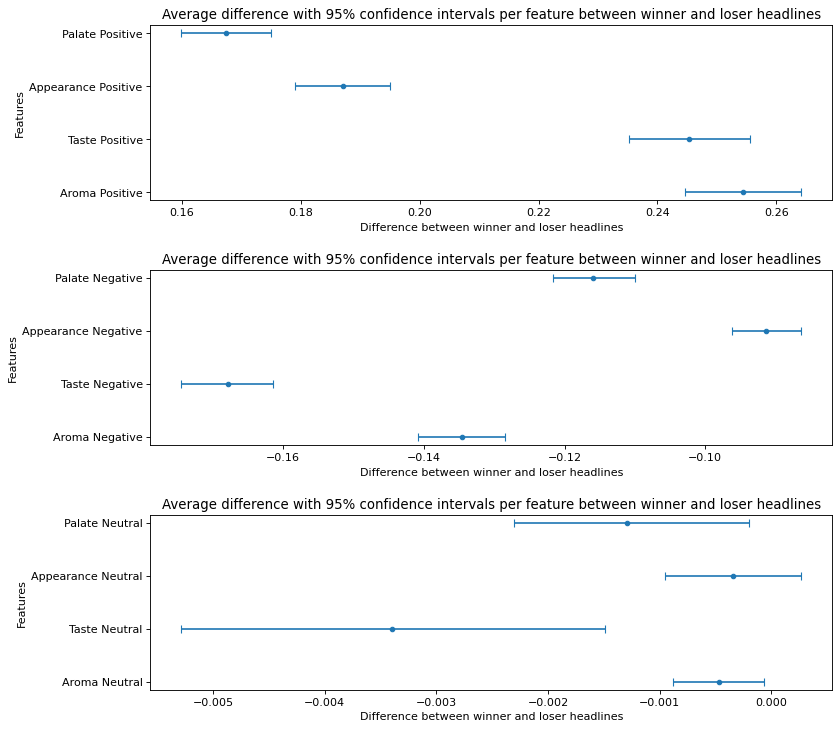

In [73]:
# create dataframe from dictionary of data
boot_effects_dataframe_negative = pd.DataFrame.from_dict(data=boot_effects_negative, orient='index', columns=['average_difference', '2.5%', '97.5%'])
boot_effects_dataframe_positive = pd.DataFrame.from_dict(data=boot_effects_positive, orient='index', columns=['average_difference', '2.5%', '97.5%'])
boot_effects_dataframe_neutral = pd.DataFrame.from_dict(data=boot_effects_neutral, orient='index', columns=['average_difference', '2.5%', '97.5%'])


# calculating errors between mean and confidence intervals boundaries
errors_negative = [boot_effects_dataframe_negative['average_difference'] -boot_effects_dataframe_negative['2.5%'], \
          boot_effects_dataframe_negative['97.5%'] - boot_effects_dataframe_negative['average_difference']]

errors_positive = [boot_effects_dataframe_positive['average_difference'] -boot_effects_dataframe_positive['2.5%'], \
          boot_effects_dataframe_positive['97.5%'] - boot_effects_dataframe_positive['average_difference']]

errors_neutral = [boot_effects_dataframe_neutral['average_difference'] -boot_effects_dataframe_neutral['2.5%'], \
          boot_effects_dataframe_neutral['97.5%'] - boot_effects_dataframe_neutral['average_difference']]

# plot the results
plt.figure(figsize=(11, 11), dpi=80)

plt.subplot(311)
plt.title('Average difference with 95% confidence intervals per feature between winner and loser headlines')
plt.xlabel('Difference between winner and loser headlines')
plt.ylabel('Features')
plt.errorbar(y=boot_effects_dataframe_positive.index, x=boot_effects_dataframe_positive['average_difference'], xerr=errors_positive,\
             fmt="o", markersize=4, capsize=4)

plt.subplot(312)
plt.title('Average difference with 95% confidence intervals per feature between winner and loser headlines')
plt.xlabel('Difference between winner and loser headlines')
plt.ylabel('Features')
plt.errorbar(y=boot_effects_dataframe_negative.index, x=boot_effects_dataframe_negative['average_difference'], xerr=errors_negative,\
             fmt="o", markersize=4, capsize=4)

plt.subplot(313)
plt.title('Average difference with 95% confidence intervals per feature between winner and loser headlines')
plt.xlabel('Difference between winner and loser headlines')
plt.ylabel('Features')
plt.errorbar(y=boot_effects_dataframe_neutral.index, x=boot_effects_dataframe_neutral['average_difference'], xerr=errors_neutral,\
             fmt="o", markersize=4, capsize=4)

# vertical line through zero as a reference for no effect
#plt.axvline(x = 0, color = 'black', linestyle = '--')
plt.subplots_adjust(hspace=0.4)
plt.show()

In [402]:
test = matched_winter_pairs.copy()
test.shape

(14757, 53)

In [403]:
test['AppearanceDiff'] = test['Appearance1'] - test['Appearance2']
for feature in features:
    test[feature + 'Diff'] = test[feature + '1'] - test[feature + '2']

In [404]:
test[(test['Appearance PositiveDiff']<0) & (test['Aroma PositiveDiff']<0) & (test['Taste PositiveDiff']<0) & (test['Palate PositiveDiff']<0)].shape

(1117, 66)

<AxesSubplot:xlabel='Appearance PositiveDiff', ylabel='Count'>

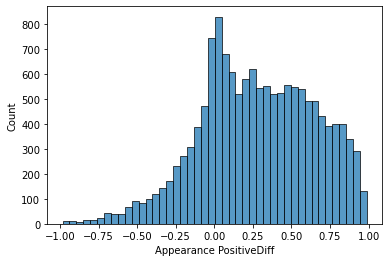

In [375]:
sns.histplot(test['Appearance PositiveDiff'])

<AxesSubplot:xlabel='Aroma PositiveDiff', ylabel='Count'>

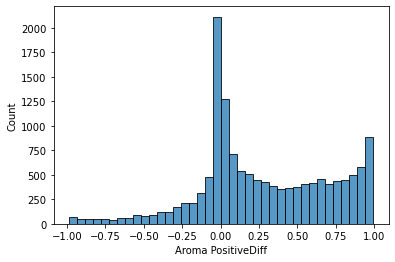

In [376]:
sns.histplot(test['Aroma PositiveDiff'])

<AxesSubplot:xlabel='Appearance NegativeDiff', ylabel='Count'>

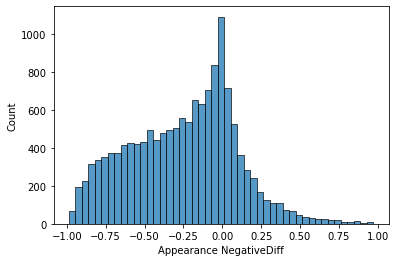

In [385]:
sns.histplot(test['Appearance NegativeDiff'])

<AxesSubplot:xlabel='Aroma NegativeDiff', ylabel='Count'>

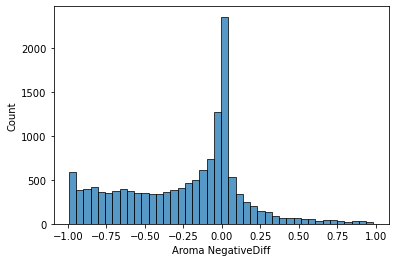

In [386]:
sns.histplot(test['Aroma NegativeDiff'])

In [381]:
for feature in features:
    print('{}: {:2}'.format(feature, 100*(test[feature +'Diff']<-0.15).sum()/test.shape[0]))

Appearance Positive: 11.714782608695652
Appearance Neutral: 14.191304347826087
Appearance Negative: 56.61217391304348
Aroma Positive: 10.685217391304349
Aroma Neutral: 10.386086956521739
Aroma Negative: 49.26608695652174
Palate Positive: 10.845217391304347
Palate Neutral: 21.89217391304348
Palate Negative: 55.23478260869565
Taste Positive: 13.565217391304348
Taste Neutral: 20.27130434782609
Taste Negative: 51.42260869565217


### Analysis based on NUMERICAL ratings:

In [62]:
boot_effects = absa_effects(matched_winter_pairs, ['Aroma', 'Taste', 'Appearance', 'Palate'])

In [63]:
boot_effects

{'Aroma': (0.780099308802602, 0.7721555871789659, 0.7875927525919902),
 'Taste': (0.8496186216710714, 0.8411393745341194, 0.8580516873348242),
 'Appearance': (0.6837347699396896, 0.6763040421494884, 0.6909280341532832),
 'Palate': (0.7920081147929795, 0.7843392118994376, 0.8010118079555465)}

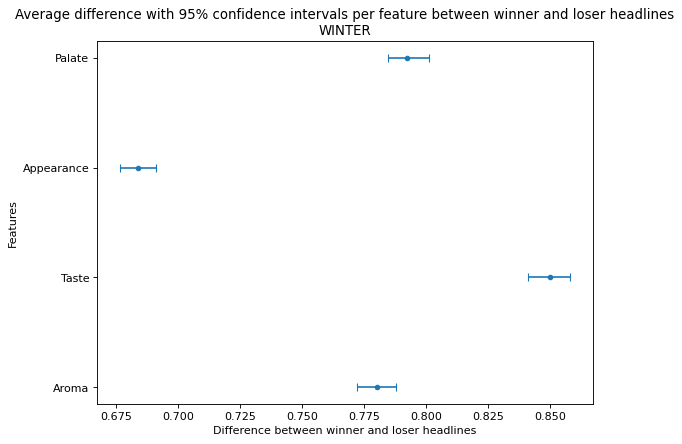

In [74]:
# create dataframe from dictionary of data
boot_effects_dataframe = pd.DataFrame.from_dict(data=boot_effects, orient='index', columns=['average_difference', '2.5%', '97.5%'])

# calculating errors between mean and confidence intervals boundaries
errors = [boot_effects_dataframe['average_difference'] -boot_effects_dataframe['2.5%'], boot_effects_dataframe['97.5%'] - boot_effects_dataframe['average_difference']]

# plot the results
plt.figure(figsize=(8, 6), dpi=80)

plt.title('Average difference with 95% confidence intervals per feature between winner and loser headlines\nWINTER')
plt.xlabel('Difference between winner and loser headlines')
plt.ylabel('Features')
plt.errorbar(y=boot_effects_dataframe.index, x=boot_effects_dataframe['average_difference'], xerr=errors, fmt="o", markersize=4, capsize=4)

# vertical line through zero as a reference for no effect
#plt.axvline(x = 0, color = 'black', linestyle = '--')

plt.show()

In [75]:
test = matched_summer_pairs.copy()
test.shape

(14375, 53)

In [76]:
boot_effects = absa_effects(matched_winter_pairs, ['Aroma', 'Taste', 'Appearance', 'Palate'])

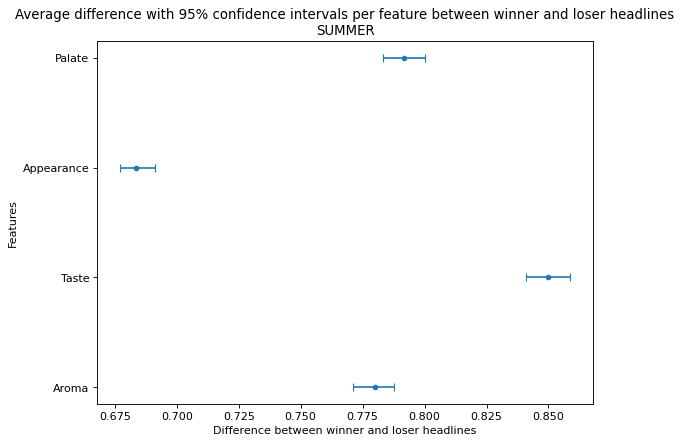

In [77]:
# create dataframe from dictionary of data
boot_effects_dataframe = pd.DataFrame.from_dict(data=boot_effects, orient='index', columns=['average_difference', '2.5%', '97.5%'])

# calculating errors between mean and confidence intervals boundaries
errors = [boot_effects_dataframe['average_difference'] -boot_effects_dataframe['2.5%'], boot_effects_dataframe['97.5%'] - boot_effects_dataframe['average_difference']]

# plot the results
plt.figure(figsize=(8, 6), dpi=80)

plt.title('Average difference with 95% confidence intervals per feature between winner and loser headlines\nSUMMER')
plt.xlabel('Difference between winner and loser headlines')
plt.ylabel('Features')
plt.errorbar(y=boot_effects_dataframe.index, x=boot_effects_dataframe['average_difference'], xerr=errors, fmt="o", markersize=4, capsize=4)

# vertical line through zero as a reference for no effect
#plt.axvline(x = 0, color = 'black', linestyle = '--')

plt.show()